## Modelling

Here a quick overview what models we used:
- IsolationForest
- SVM
- LOV
- DBSCan
- XGBoost

The main question we want to solve using these models is:
<div class="alert alert-block alert-success">
Can we find any anomalies based on data we were given?
</div>

### IsolationForest

<div class="alert alert-block alert-warning">
The code for the isolation forest model can be accessed via the file code/model.py.
Due to time reasons it is only on the branch "isolaton_forest"
</div>

We added the preprocessed data into the IsolationForest model. We did a version without hypertuning (next_model) because the kernel crashed when trying to use "optuna", an open-source tool for hypertuning.
In the following, there is a PCA plot that projects the anomalies detected and the normal ones.

What we can conclude is:
<div class="alert alert-block alert-success">
There are more anomalies than normal datapoints when projecting on PCA2.
</div>

<div class="alert alert-block alert-success">
As expected the anomalies are very spread accross the plot.
</div>

<div class="alert alert-block alert-danger">
But there is no obvious pattern visible from anomaly to the normal datapoints...
</div>

**Improvement:**
- Hyperparametertuning was done only quickly. 

In [ ]:

def time_based_split(df, date_column, split_ratio=0.8):
    df[date_column] = pd.to_datetime(df[date_column])
    df = df.sort_values(by=date_column)
    split_index = int(len(df) * split_ratio)
    train = df[:split_index]
    test = df[split_index:]
    return train, test

def next_model(df, features):

    # Example model training
    clf = IsolationForest(random_state=42)
    clf.fit(df)

    # Predict anomalies
    anomalies = clf.predict(df)

    # Add predictions to the original DataFrame
    df['anomaly'] = anomalies

    # Filter the DataFrame to show only the anomalies
    #anomalous_data = df[df['anomaly'] == 1]

    return df

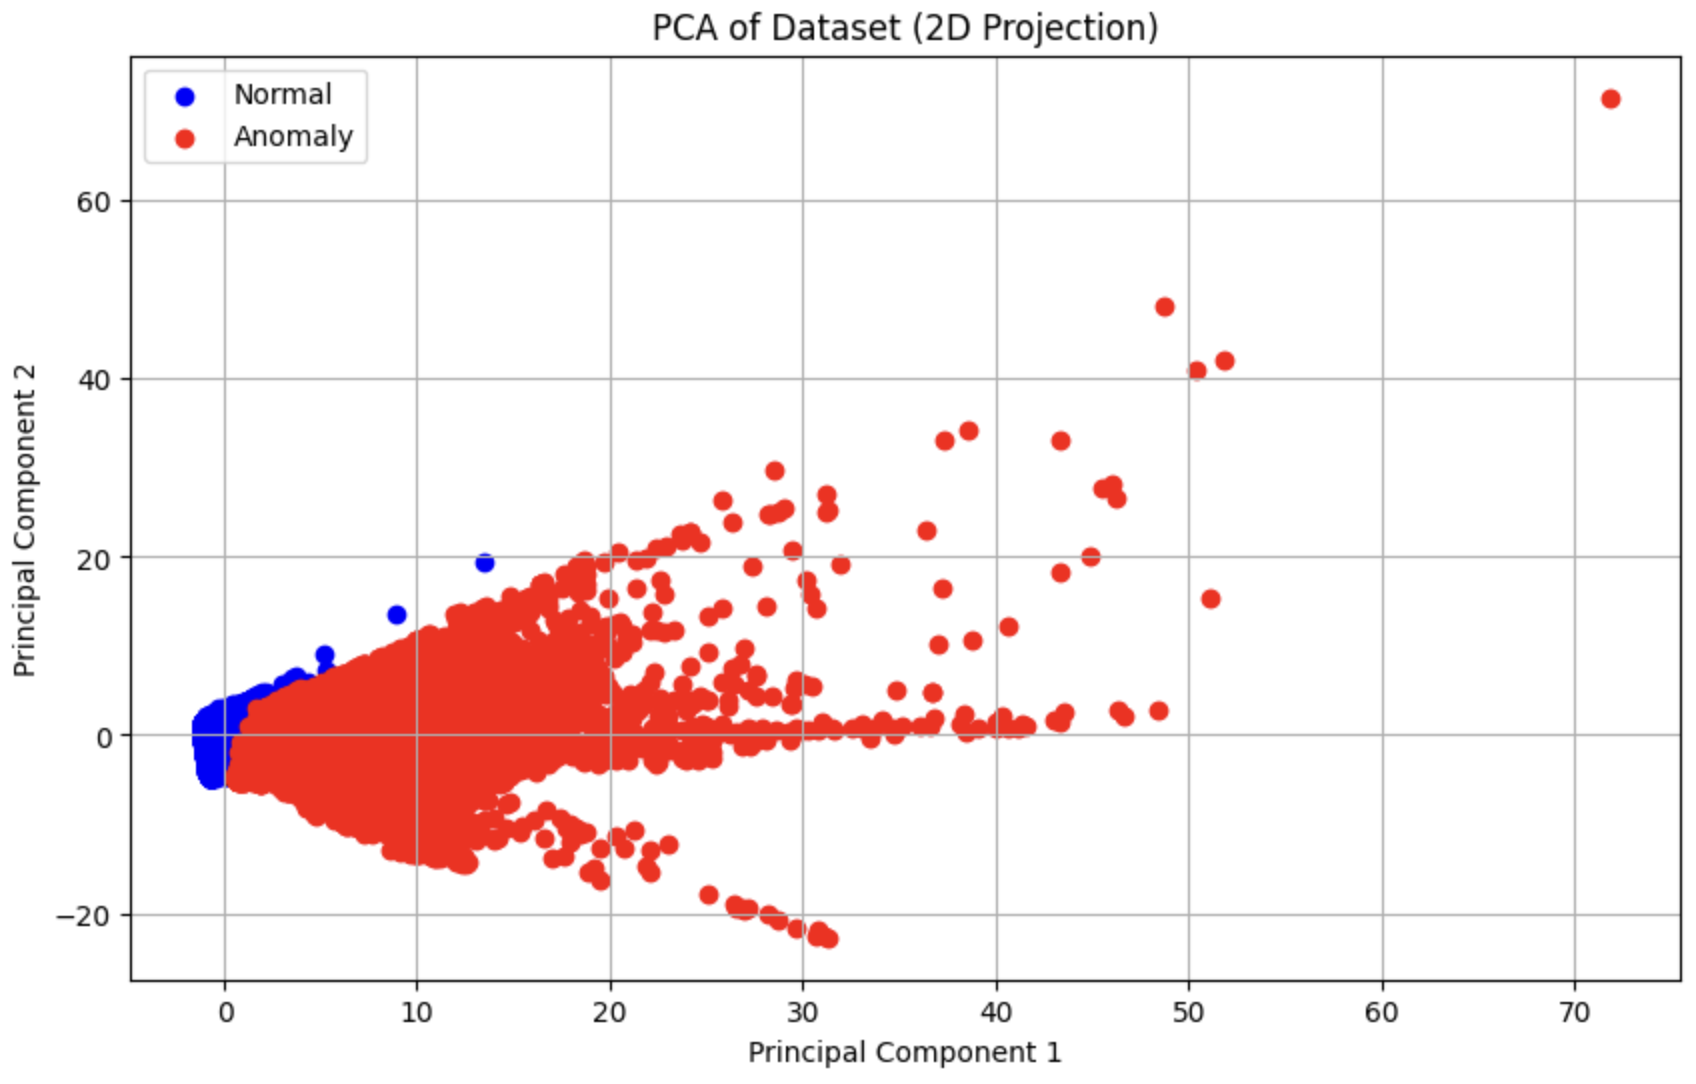

### OneClassSVM

Since IsolationForest wasn't very informative, we went on trying a different classification method to find the anomalies, namely OneClassSVM.

<div class="alert alert-block alert-warning">
The detailed implementation can be found in the individualNotebooks/asy_models.ipynb
</div>


<div class="alert alert-block alert-danger">
<b>Assumption: </b> Different subsets of data (different industry, country) have the same distribution of the numberical variables.
</div>

Therefore, we take a random subset to train the algorithm.

For the hyperparameter-tuning we applied gridsearch.

**Improvement**: 
- It would be better to get the whole dataset. The measurements taken above was only due to the time constraint.
- The same goes for the hyperparameter tuning. Usually one should use cross validation...

<div class="alert alert-block alert-danger">
Out of all this model detected 60 % of the dataset as an anomaly.
</div>

This model is definitely horrible, or no obvious patterns with the given features can be found.


### LOF (Local Outlier Factor)

We want to explore a further model. The percentage of number of anomalies detected will be the main metric for comparing these models.

The same as in SVM we only run it on a subset and the detailed code can also be found there.

In the following the number of anomalies detected based on different hyperparameters is shown.

<div class="alert alert-block alert-success">
The hyperparameters have no impact on the number of anomalies detected.
</div>
It could simply be that we haven't tuned enough.

<div class="alert alert-block alert-success">
A bit more than 8 % of the data is detected as an anomaly.
</div>


<img src="../pics/lof.png" />

### DBScan

We have found a model that doesn't think that the data is just "random" (LOF).
What about another model?
The same setup is also used for this model for comparison reasons.

In the following is a table about some results with different hyperparameters:
- The first two columns are hyperparameters.
- pers_outl: is the percentage of data not being an anomaly.
- n_noise: Total predicted number of noise / anomaly.


This model is definitely more prone to the hyperparameters. Why? Sorry no time for answering that :/

The max ratio of outliers: 42 %
The min ratio of outliers: 0.4 %



<img src="../pics/dbscan.jpeg" />